In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge,Lasso,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor, BaggingClassifier, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,accuracy_score,confusion_matrix
from xgboost import XGBRegressor,XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree


import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/An introduction to statistical analysis/data/OJ.csv')
df = df.iloc[:, 1:]
df.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Purchase        1070 non-null   object 
 1   WeekofPurchase  1070 non-null   int64  
 2   StoreID         1070 non-null   int64  
 3   PriceCH         1070 non-null   float64
 4   PriceMM         1070 non-null   float64
 5   DiscCH          1070 non-null   float64
 6   DiscMM          1070 non-null   float64
 7   SpecialCH       1070 non-null   int64  
 8   SpecialMM       1070 non-null   int64  
 9   LoyalCH         1070 non-null   float64
 10  SalePriceMM     1070 non-null   float64
 11  SalePriceCH     1070 non-null   float64
 12  PriceDiff       1070 non-null   float64
 13  Store7          1070 non-null   object 
 14  PctDiscMM       1070 non-null   float64
 15  PctDiscCH       1070 non-null   float64
 16  ListPriceDiff   1070 non-null   float64
 17  STORE           1070 non-null   i

In [ ]:
df['Purchase'] = (df['Purchase'] == 'CH').astype(int)
df['Store7'] = (df['Store7'] == 'Yes').astype(int)


In [ ]:
X = df.drop(['Purchase'], axis = 1)
y = df['Purchase']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7477, random_state=2025)

print(f'The shape of train is: {X_train.shape}')
print(f'The shape of test is: {X_test.shape}')

The shape of train is: (800, 17)
The shape of test is: (270, 17)


Number of terminal nodes (leaves): 16
depth of the tree: 4
Training Error Rate: 0.1388


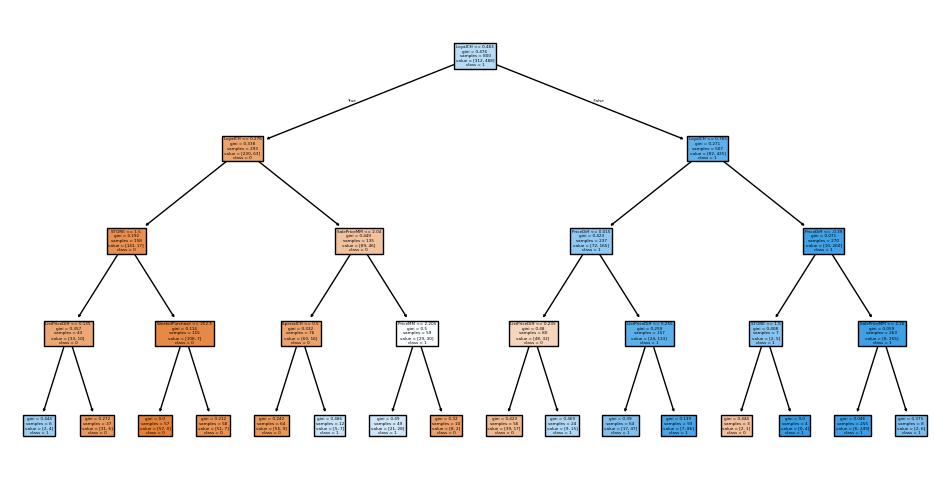

In [ ]:
dt = DecisionTreeClassifier(random_state = 2025, max_depth = 4).fit(X_train, y_train)

print(f'Number of terminal nodes (leaves): {dt.get_n_leaves()}')
print(f'depth of the tree: {dt.get_depth()}')


y_train_pred = dt.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_error_rate = 1 - train_accuracy
print(f'Training Error Rate: {train_error_rate:.4f}')


plt.figure(figsize=(12, 6))
plot_tree(dt, feature_names=X.columns, class_names=np.unique(y).astype(str), filled=True)
plt.show()

With a depth of 4, the model is able to predict with 86% accuracy which is decent.

[]

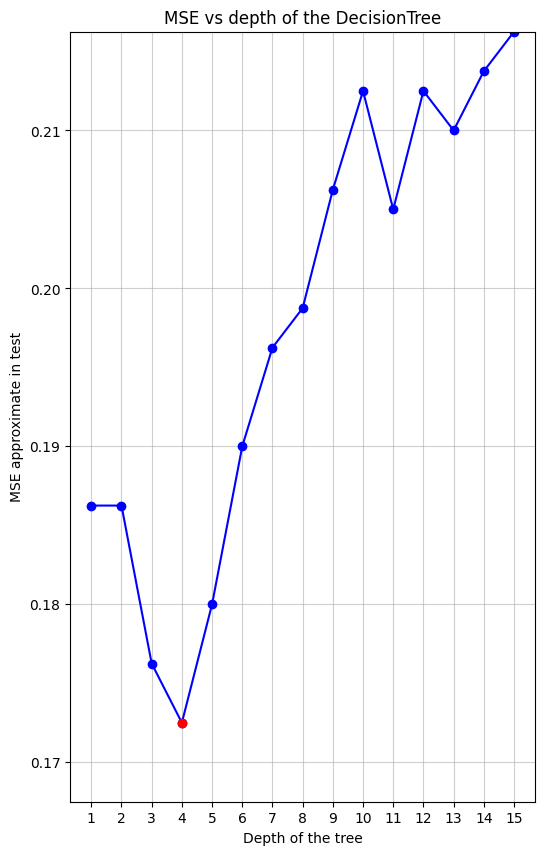

In [ ]:
#Finding Optimal Depth
scores_mse = {}
max_depth = 15
for depth in range(1, max_depth + 1):
    rf = DecisionTreeClassifier(max_depth = depth, random_state = 2025)
    mse = 1 - (np.mean(cross_val_score(rf, X_train, y_train, scoring='accuracy', cv = 10)))
    scores_mse[depth] = mse
best_depth = min(scores_mse, key = scores_mse.get)
best_score = scores_mse[best_depth]
worst_depth = max(scores_mse, key = scores_mse.get)
worst_score = scores_mse[worst_depth]

plt.figure(figsize = (6, 10))
plt.plot(range(1, max_depth + 1), scores_mse.values(), marker = 'o', color = 'blue')
plt.plot(best_depth, best_score, marker = 'o', color = 'red')
plt.xlabel('Depth of the tree')
plt.xticks(ticks = range(1, max_depth + 1))
plt.ylim(best_score - 0.005, worst_score)
plt.ylabel('MSE approximate in test')
plt.title('MSE vs depth of the DecisionTree')
plt.grid(alpha = 0.6)
plt.plot()

In [ ]:
dt = DecisionTreeClassifier(max_depth = 4, random_state = 2025)
dt.fit(X_train, y_train)

model_preds = dt.predict(X_test)

mse = mean_squared_error(y_test, model_preds)
print(f'The MSE on test is : {mse:.5f}')

The MSE on test is : 0.18148


Making a tree with more than 5 terminal nodes 
with a depth = 1 we obtained a tree with 2 leaves.


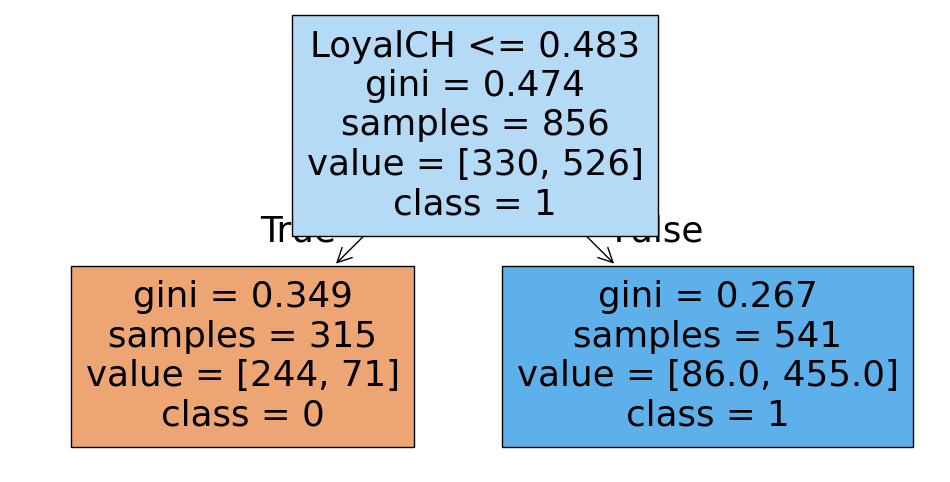

In [ ]:
if dt.get_n_leaves() > 5:
    print('Making a tree with more than 5 terminal nodes ')

    for alpha in range(1, max_depth + 1):
        temp_tree = DecisionTreeClassifier(random_state=2025, max_depth=alpha)
        temp_tree.fit(X_train, y_train)
        if temp_tree.get_n_leaves() <= 5:
            pruned_tree = temp_tree
            print(f'with a depth = {alpha} we obtained a tree with {temp_tree.get_n_leaves()} leaves.')
            break

plt.figure(figsize=(12, 6))
plot_tree(pruned_tree, feature_names=X.columns, class_names=np.unique(y).astype(str), filled=True)
plt.show()

In [ ]:
unpruned_tree = DecisionTreeClassifier(random_state=2025)
unpruned_tree.fit(X_train, y_train)

y_train_pred_unpruned = unpruned_tree.predict(X_train)
y_test_pred_unpruned = unpruned_tree.predict(X_test)

train_error_unpruned = 1 - accuracy_score(y_train, y_train_pred_unpruned)
test_error_unpruned = 1 - accuracy_score(y_test, y_test_pred_unpruned)

print(f"Training Error (Unpruned Tree): {train_error_unpruned:.4f}")
print(f"Test Error (Unpruned Tree): {test_error_unpruned:.4f}")


Training Error (Unpruned Tree): 0.0093
Test Error (Unpruned Tree): 0.2336


In [ ]:
y_train_pred_pruned = pruned_tree.predict(X_train)
y_test_pred_pruned = pruned_tree.predict(X_test)

train_error_pruned = 1 - accuracy_score(y_train, y_train_pred_pruned)
test_error_pruned = 1 - accuracy_score(y_test, y_test_pred_pruned)

print(f"Training Error (Pruned Tree): {train_error_pruned:.4f}")
print(f"Test Error (Pruned Tree): {test_error_pruned:.4f}")


Training Error (Pruned Tree): 0.1834
Test Error (Pruned Tree): 0.2196


As seen before, if we dont prun the tree we get a a super low bias on the train but a very high variance in test. But if we prun the tree we increment a lot the bias with a more reduce but considerable bias on the test.

Thats why Bagging is too good, we can take the average of a group of trees that will get lower bias because their complexity and when averaged reduce the variance a lot.



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/An introduction to statistical analysis/data/Hitters.csv')
df = df.iloc[:, 1:]
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [ ]:
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64(1), 

In [ ]:
df['League'] = (df['League'] == 'A').astype(int)
df['NewLeague'] = (df['NewLeague'] == 'A').astype(int)
df['Division'] = (df['Division'] == 'W').astype(int)

In [ ]:
df['Salary'] = np.log1p(df['Salary'])

X = df.drop(['Salary'], axis = 1)
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7606, random_state=2025)
print(f'The train shape is {X_train.shape}')
print(f'The test shape is {X_test.shape}')

The train shape is (200, 19)
The test shape is (63, 19)


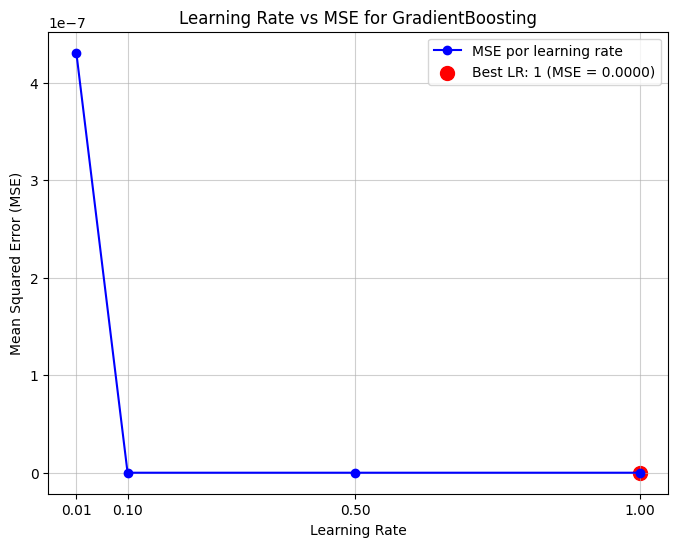

In [ ]:
learning_rates_list = [0.01, 0.1, 0.5, 1]
train_scores_dict = {}

for rate in learning_rates_list:
    boosting = GradientBoostingRegressor(random_state=2025, n_estimators=1000, learning_rate=rate)
    boosting.fit(X_train, y_train)
    model_preds = boosting.predict(X_train)
    mse = mean_squared_error(y_train, model_preds)
    train_scores_dict[rate] = mse

best_lr = min(train_scores_dict, key=train_scores_dict.get)
best_score = train_scores_dict[best_lr]

plt.figure(figsize=(8, 6))
plt.plot(learning_rates_list, list(train_scores_dict.values()), marker='o', color='blue', label='MSE por learning rate')
plt.scatter(best_lr, best_score, color='red', s=100, label=f'Best LR: {best_lr} (MSE = {best_score:.4f})')

plt.xlabel('Learning Rate')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Learning Rate vs MSE for GradientBoosting')
plt.grid(True, alpha=0.6)
plt.xticks(learning_rates_list)

plt.legend()
plt.show()


In [ ]:
boosting = GradientBoostingRegressor(random_state=2025, n_estimators=1000, learning_rate=1)
boosting.fit(X_train, y_train)

model_preds_train = boosting.predict(X_train)
mse_train = mean_squared_error(y_train, model_preds_train)
print(f'The MSE on train is: {mse_train}')
model_preds_test = boosting.predict(X_test)
mse_test = mean_squared_error(y_test, model_preds_test)
print(f'The MSE on test is: {mse_test}')

The MSE on train is: 2.0482758536444551e-16
The MSE on test is: 7.647879820313099e-06


The predictions were perfect almost with 0 variance (remembering the MSE is based on a logarithmic scale since we transformed Salary with log). We see that train obtained a huge overfit resulting in high variance.

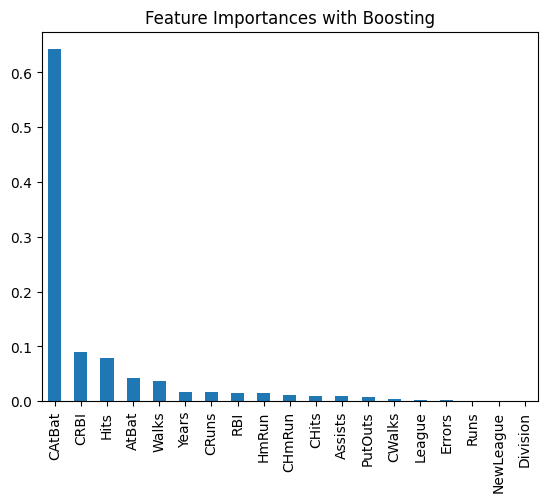

In [ ]:
importance = pd.Series(boosting.feature_importances_, index = X.columns).sort_values(ascending = False).plot.bar(legend = False, title = 'Feature Importances with Boosting')

In [ ]:
#WHAT ABOUT BAGGING INSTEAD OF BOOSTING
base_tree = DecisionTreeRegressor(random_state = 2025)
bagging = BaggingRegressor(estimator = base_tree, n_estimators = 1000, bootstrap = True, random_state = 2025)

bagging.fit(X_train, y_train)
model_preds = bagging.predict(X_test)
mse_bag = mean_squared_error(y_test, model_preds)
print(f'THE MSE in test is : {mse_bag}')

THE MSE in test is : 6.0333544382074e-06


Bagging resulted on a worse model than Boosting but it should be take on account that this wasnt not hypertunned like we did with boosting. And we are not considering the variance between train & test in both models.